# Heart Attack and Poverty Analysis

In [5]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import requests
from pprint import pprint
from census import Census
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from requests.structures import CaseInsensitiveDict
import datetime
from scipy import stats


# File to Load (Remember to Change These)
path_poverty = Path("Resources/minnesota_poverty_data.csv")
path_heart = Path("Resources/heart_attack_hospitalizations_by_county.csv")

poverty_df = pd.read_csv(path_poverty)
heart_df = pd.read_csv(path_heart)
print(poverty_df['Year'])

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
1039    2021
1040    2021
1041    2021
1042    2021
1043    2021
Name: Year, Length: 1044, dtype: int64


In [16]:
# Find the common years
common_years = set(poverty_df['Year']).intersection(lead_df['year'])

# Filter both DataFrames to include only the common years
filtered_poverty_df = poverty_df[poverty_df['Year'].isin(common_years)]
filtered_lead_df = lead_df[lead_df['year'].isin(common_years)]

# Perform the merge on the filtered DataFrames
poverty_lead_df = pd.merge(filtered_poverty_df, filtered_lead_df, left_on=['County', 'Year'], right_on=['location', 'year'], how='inner')

poverty_lead_df = poverty_lead_df[poverty_lead_df['unstable'] != True]

# Now you have a DataFrame with data for the common years
poverty_lead_df.head()


,Sample Population,Population Poverty,Female Poverty,Females < 5 Poverty,Females 5 Poverty,Females 6 to 11 Poverty,Females 12 to 14 Poverty,Females 15 Poverty,Females 16 to 17 Poverty,Females 18 to 24 Poverty,...,ageGroup,ebllDescription,pctEbll,fips,numTested,numEbll,denominator,pctTested,unstable,Unnamed: 12
78,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,<3 years,>10 mcg/dL (historic reference level),0.4,27053.0,18638.0,76.0,46098.0,40.4,False,NaN
80,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,<6 years,>10 mcg/dL (historic reference level),0.4,27053.0,22063.0,95.0,91316.0,24.2,False,NaN
183,488851.0,77325.0,42196.0,4308.0,814.0,4939.0,1955.0,651.0,1645.0,8132.0,...,<3 years,>10 mcg/dL (historic reference level),0.5,27123.0,10398.0,49.0,21375.0,48.6,False,NaN
185,488851.0,77325.0,42196.0,4308.0,814.0,4939.0,1955.0,651.0,1645.0,8132.0,...,<6 years,>10 mcg/dL (historic reference level),0.5,27123.0,11824.0,63.0,41811.0,28.3,False,NaN
339,1124293.0,138258.0,73852.0,6581.0,1335.0,6466.0,2784.0,1023.0,2160.0,14161.0,...,<3 years,>10 mcg/dL (historic reference level),0.4,27053.0,18259.0,68.0,46675.0,39.1,False,NaN


In [17]:
print(poverty_lead_df['pctEbll'].dtype)
poverty_lead_df['pctEbll'] = poverty_lead_df['pctEbll'].fillna(0)
poverty_lead_df['pctEbll'] = pd.to_numeric(poverty_lead_df['pctEbll'], errors='coerce').fillna(0)

# Sort the DataFrame by 'pctEbll' in descending order
poverty_lead_df = poverty_lead_df.sort_values(by='pctEbll', ascending=False)

# Display the top N counties with the highest 'pctEbll'
top_elevated_lead_counties = poverty_lead_df.head(10)

print(top_elevated_lead_counties[['County', 'pctEbll', 'Year']])

object
        County  pctEbll  Year
1750    Ramsey      1.8  2016
601   Hennepin      0.9  2012
183     Ramsey      0.5  2010
185     Ramsey      0.5  2010
2273    Ramsey      0.5  2018
446     Ramsey      0.5  2011
1751    Ramsey      0.5  2016
602   Hennepin      0.5  2012
78    Hennepin      0.4  2010
968     Ramsey      0.4  2013


## Gender and Poverty

In [26]:
gender_df = poverty_df[['Year','County','Female Poverty %','Male Poverty %']]
gender_df = gender_df.groupby('Year')
gender_df.head()

,Year,County,Female Poverty %,Male Poverty %
0,2010,Aitkin,7.421415,6.125612
1,2010,Anoka,3.629403,2.781429
2,2010,Becker,6.351915,4.879282
3,2010,Beltrami,10.769926,9.169184
4,2010,Benton,6.869637,4.966454
87,2011,Aitkin,6.891623,5.350485
88,2011,Anoka,3.611881,2.990159
89,2011,Becker,6.647009,4.880956
90,2011,Beltrami,10.769303,8.901399
91,2011,Benton,7.810717,5.544202


In [51]:
female_poverty_mean = gender_df['Female Poverty %'].mean()
male_poverty_mean = gender_df['Male Poverty %'].mean()

print('Average Female Poverty Rates per County')
print('___________________________________________')
print(female_poverty_mean)
print('')

print('Average Male Poverty Rates per County')
print('___________________________________________')
print(male_poverty_mean)

Average Female Poverty Rates per County
___________________________________________
Year
2010    6.031411
2011    6.297198
2012    6.337771
2013    6.405957
2014    6.484602
2015    6.430316
2016    6.247160
2017    6.132849
2018    5.959459
2019    5.736342
2020    5.539813
2021    5.522323
Name: Female Poverty %, dtype: float64

Average Male Poverty Rates per County
___________________________________________
Year
2010    4.867449
2011    5.087485
2012    5.225802
2013    5.278743
2014    5.272646
2015    5.239084
2016    5.006195
2017    4.905911
2018    4.792985
2019    4.605273
2020    4.437608
2021    4.530933
Name: Male Poverty %, dtype: float64


In [54]:
female_poverty_mean_noIndex = gender_df['Female Poverty %'].mean().reset_index(drop=True)
male_poverty_mean_noIndex = gender_df['Male Poverty %'].mean().reset_index(drop=True)
years = gender_df['Year'].unique()

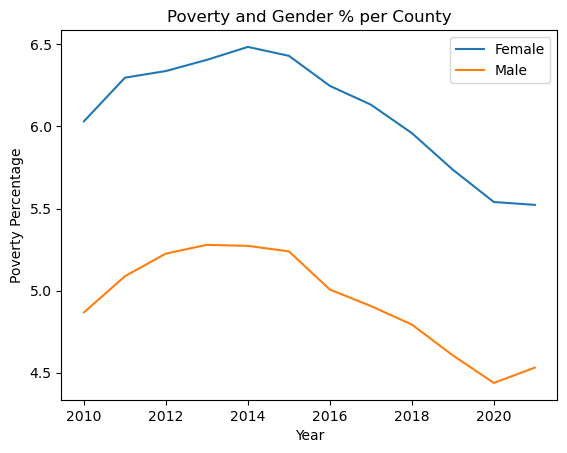

In [56]:
# Create a line plot
plt.plot(years, female_poverty_mean_noIndex, label='Female')
plt.plot(years, male_poverty_mean_noIndex, label='Male')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Poverty Percentage')
plt.title('Poverty and Gender % per County')

# Add a legend
plt.legend()

# Show the plot
plt.show()